# Basics of logistic regression

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the data

In [2]:
raw_data = pd.read_csv('Admittance.csv')
raw_data.head(10)

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
5,1755,Yes
6,1775,Yes
7,1887,Yes
8,1893,Yes
9,1580,No


In [3]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1,'No':0})
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


## Variables

In [4]:
y = data['Admitted']
x1 = data['SAT']

## Let's plot the data

### Scatter plot

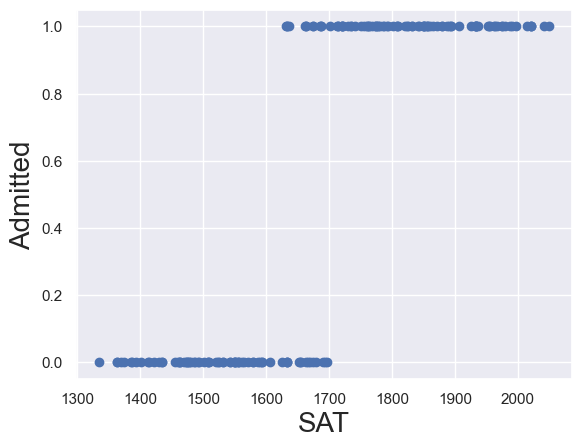

In [5]:
plt.scatter(x1, y, color='C0')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admitted', fontsize=20)
plt.show()

### Plot with a regression line

/tmp/ipykernel_5512/985088825.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_hat = x1 * results_lin.params[1] + results_lin.params[0]


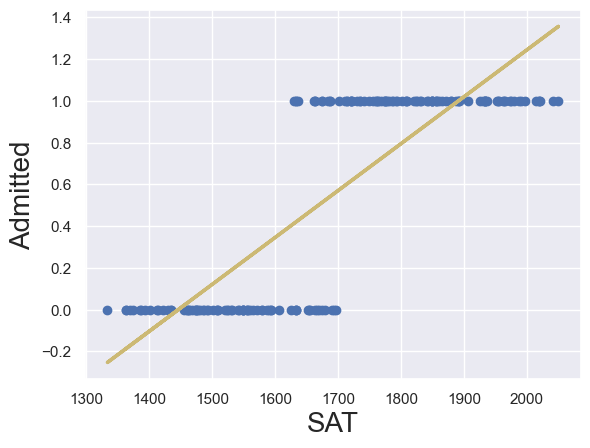

In [6]:
x = sm.add_constant(x1)
reg_lin = sm.OLS(y,x)
results_lin = reg_lin.fit()

plt.scatter(x1, y, color='C0')

y_hat = x1 * results_lin.params[1] + results_lin.params[0]
plt.plot(x1, y_hat, lw=2.5, color='C8')

plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admitted', fontsize=20)
plt.show()

### Plot with a logistic regression curve

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


/tmp/ipykernel_5512/3486590167.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f_sortrd = np.sort(f(x1, results_log.params[0], results_log.params[1]))


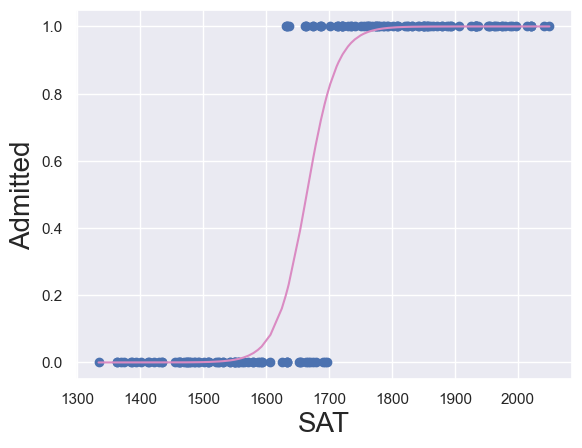

In [7]:
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

f_sortrd = np.sort(f(x1, results_log.params[0], results_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1, y, color='C0')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admitted', fontsize=20)
plt.plot(x_sorted,f_sortrd, color='C6')
plt.show()

# reg_log = sm.add

In [8]:
results_log.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Wed, 18 Oct 2023   Pseudo R-squ.:                  0.7992
Time:                        01:51:52   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

# Another example of dummies binary predictors

In [9]:
raw_data2 = pd.read_csv('Binary-predictors.csv')
raw_data2

,SAT,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female
3,1653,No,Male
4,1593,No,Male
...,...,...,...
163,1722,Yes,Female
164,1750,Yes,Male
165,1555,No,Male
166,1524,No,Male


In [11]:
data2 = raw_data2.copy()
data2['Admitted'] = data2['Admitted'].map({'Yes':1, 'No':0})
data2['Gender'] = data2['Gender'].map({'Female':1, 'Male':0})
data2

,SAT,Admitted,Gender
0,1363,0,0
1,1792,1,1
2,1954,1,1
3,1653,0,0
4,1593,0,0
...,...,...,...
163,1722,1,1
164,1750,1,0
165,1555,0,0
166,1524,0,0


## Declare the depandent and the independent variables

In [18]:
x3 = data2[['Gender', 'SAT']]
y2 = data2['Admitted']

## Regression

In [19]:
x2 = sm.add_constant(x3)
reg_log2 = sm.Logit(y2, x2)
results_log2 = reg_log2.fit()
results_log2.summary()

Optimization terminated successfully.
         Current function value: 0.120117
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            2
Date:                Wed, 18 Oct 2023   Pseudo R-squ.:                  0.8249
Time:                        02:32:01   Log-Likelihood:                -20.180
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.118e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -68.3489     16.454     -4.154      0.000    -100.598     -36.100
Gender         1.9449      0.846      2.299      0.022       0.287       3.603
SAT            0.0406      0.010      4.129      0.000       0.021       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [24]:
np.exp(1.9449)

6.992932526814459